In [1]:
import numpy as np
import matplotlib.pyplot as plt

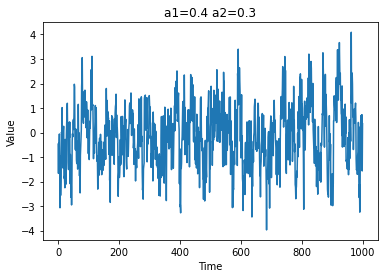

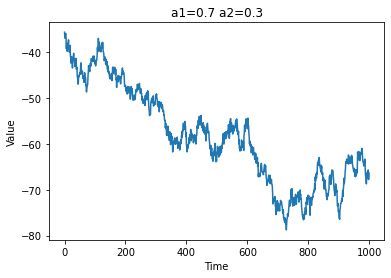

In [2]:
noise=np.random.normal(0, 1, size=2000)
a1=0.4
a2=0.3
x=[0,noise[1]]
x2=[0,noise[1]]
for i in range(2,len(noise)):
    x.append(x[i-1]*a1+x[i-2]*a2+noise[i])
    x2.append(x2[i-1]*0.7+x2[i-2]*a2+noise[i])
plt.plot(np.arange(len(x[1000:])),x[1000:])
plt.title("a1=0.4 a2=0.3")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
plt.plot(np.arange(len(x2[1000:])),x2[1000:])
plt.title("a1=0.7 a2=0.3")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Aufgabe 3

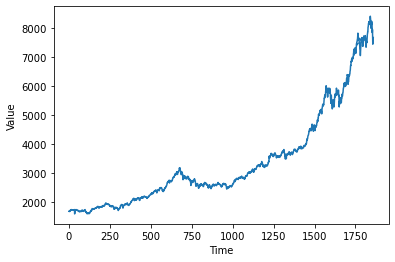

In [3]:
f=open("smi.txt","r")
text=f.read()
f.close()
text=text.split("\n")
data=[]
for i in text:
    data.append(i.split("\t")[1])
data=np.array(data)
data=data.astype(float)
xaxis= np.arange(len(data))
plt.plot(xaxis,data)
plt.xlabel("Time")
plt.ylabel("Value")
a=np.linspace(1587,8412,6826)

In [4]:
arr1=data[:len(data)//2]
arr2=data[len(data)//2:]

The empirical distributions should look the same in case of a stationary time series, but as we will see that is not the case here. 

In [5]:
x=[]
x2=[]
price=[]
price2=[]
for i in a:
    count=0
    for j in arr1:
        if(i<j and j<= i+1):
            count=count+1
    x.append(count)
    count=0
    for j in arr2:
        if(i<j and j<= i+1):
            count=count+1
    x2.append(count)

count=0
for i in x:
    count=count+int(i)*1/len(arr1)
    price.append(count)
count=0
for i in x2:
    count=count+int(i)*1/len(arr1)
    price2.append(count)

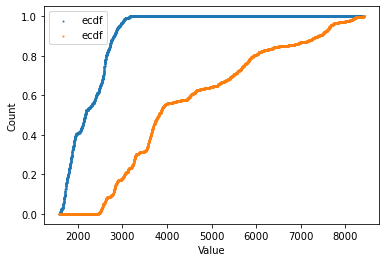

In [6]:
plt.scatter(a,price,label="ecdf",s=1)
plt.scatter(a,price2,label="ecdf",s=1)
plt.legend()
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

Another way is to compare the means of the chosen sample partition and to see that they're not equal.
Here we test it for two sets of partitions(dataset split in two and then the first half splitted)

In [7]:
m1=np.mean(arr1)
m2=np.mean(arr2)
print(m1)
print(m2)

2231.0920430107526
4521.355376344086


In [8]:
arr1=data[:len(data)//4]
arr2=data[len(data)//4:len(data)//2]
m1=np.mean(arr1)
m2=np.mean(arr2)
print(m1)
print(m2)

1849.5309677419355
2612.65311827957


We can clearly see that the means are not constant for the to partions

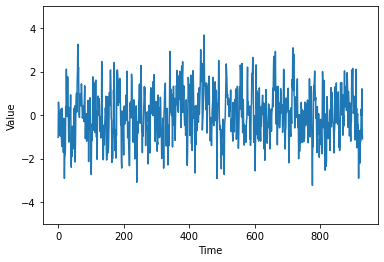

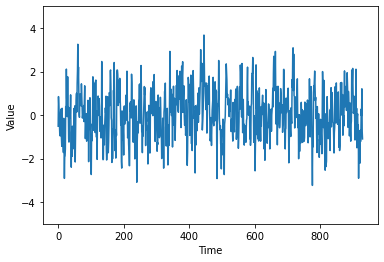

In [9]:
data=(data-np.mean(data))/np.std(data)
arr1=data[:len(data)//2]
arr2=data[len(data)//2:]
noise=np.random.normal(0, 1, size=1860//2)
ar1=[arr1[0]]
ar2=[arr2[0]]
for i in range(1,len(arr1)):
    ar1.append(0.5*ar1[i-1]+noise[i])
    ar2.append(0.5*ar2[i-1]+noise[i])
plt.plot(np.arange(len(ar1)),ar1)
plt.ylim(-5,5)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()
plt.plot(np.arange(len(ar2)),ar2)
plt.ylim(-5,5)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [10]:
def ecdf(data):
    x=[]
    price=[]
    mi,ma=int(np.min(data)-1),int(np.max(data)+1)
    a=np.linspace(mi,ma,(ma-mi)*len(data)+1)
    for i in a:
        count=0
        for j in data:
            if(i<j and j<= i+1):
                count=count+1
        x.append(count)
    count=0
    for i in x:
        count=count+int(i)/sum(x)
        price.append(count)
    return (a,price)

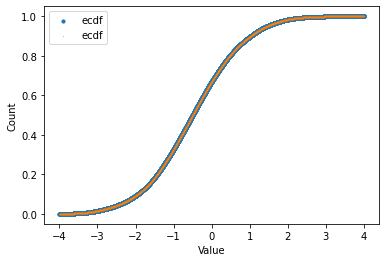

In [11]:
ec=ecdf(ar1)
plt.scatter(ec[0],ec[1],label="ecdf",s=10)
ec=ecdf(ar2)
plt.scatter(ec[0],ec[1],label="ecdf",s=0.05)
plt.xlabel("Lags")
plt.ylabel("Autocorr")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

# Aufgabe 4.1

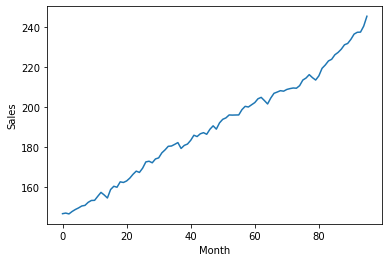

In [12]:
f=open("salesUS.txt","r")
text=f.read()
f.close()
text=text.split("\n")
data=[]
for i in text:
    data.append(i.split("\t")[1])

data=np.array(data)
data=data.astype(float)
plt.plot(np.arange(len(data)),data)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [13]:
def lags(h, y):
    tmp=0
    tmp2=0
    t_mean=np.mean(y)
    for i in range(h+1, len(y)):
        tmp+=(y[i]-t_mean)*(y[i-h]-t_mean)
    for i in range(len(y)):
        tmp2+=(y[i]-t_mean)**2
    return tmp/tmp2   

def acf(data,l):
    x=np.arange(l)
    y=[]
    for i in range(l):
        y.append(lags(i,data))
    for i in x:
        plt.plot([i,i],[0,y[i]], c='tab:blue')
    plt.scatter(x,y)
    if np.min(y)>=0:
        plt.ylim(0,1.1)
    else:
        plt.ylim(-1.1,1.1)
    plt.xlabel("Lags")
    plt.ylabel("Autocorr")
    
    plt.show()

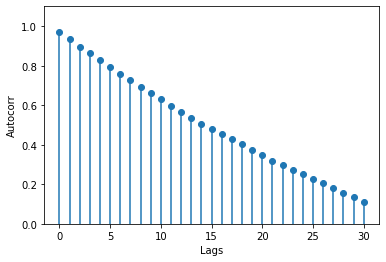

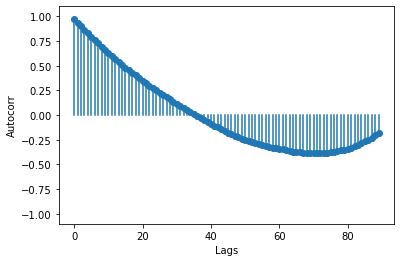

In [14]:
acf(data,31)
acf(data,90)

The acf look like the smi data just with a steeper decend.  
The autocorrelation does not vanish.